<a href="https://colab.research.google.com/github/precognitor/07MBIG---Visualizacion-de-Datos/blob/master/Gr%C3%A1ficas_Seminario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python

# CARGAR DATOS Y ANÁLISIS INICIAL


In [261]:
# import packages
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None


In [262]:
#import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.mlab as mlab
#import matplotlib
#plt.style.use('ggplot')
#from matplotlib.pyplot import figure

#%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (12,8)

In [263]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [264]:
print(df.shape)

(891, 12)


In [265]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [266]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

PassengerId - 0.0%
Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 19.87%
SibSp - 0.0%
Parch - 0.0%
Ticket - 0.0%
Fare - 0.0%
Cabin - 77.1%
Embarked - 0.22%


In [267]:
df=df.drop('Cabin',axis=1)
df.shape

(891, 11)

In [268]:
top = df['Embarked'].describe()['top']
print(top)

S


In [269]:
df['Embarked'] = df['Embarked'].fillna(top)

In [270]:
df['Age'] = df['Age'].fillna(-1)

In [37]:
#df['Age'] = df['Age'].dropna().astype(np.int64)

In [271]:
cols_to_drop = ['Ticket','Name']
df = df.drop(cols_to_drop, axis=1)


In [272]:
df = df.drop('PassengerId', axis=1)

In [273]:
df.shape

(891, 8)

In [274]:
df.Fare=round(df.Fare,2)

In [275]:
df['GrupoEdad']=df.Age
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,GrupoEdad
0,0,3,male,22.0,1,0,7.25,S,22.0
1,1,1,female,38.0,1,0,71.28,C,38.0
2,1,3,female,26.0,0,0,7.92,S,26.0
3,1,1,female,35.0,1,0,53.10,S,35.0
4,0,3,male,35.0,0,0,8.05,S,35.0


In [276]:
for i in range(0,len(df.Age)):
  if 0<=df.Age[i]<13:
    df.GrupoEdad[i]="0-12"
  elif 13<=df.Age[i]<21:
    df.GrupoEdad[i]="13-20"
  elif 21<=df.Age[i]<29:
    df.GrupoEdad[i]="21-28"
  elif 29<=df.Age[i]<39:
    df.GrupoEdad[i]="29-38"
  elif 39<=df.Age[i]<100:
    df.GrupoEdad[i]=">39"
  else:
    df.GrupoEdad[i]="unknown"
  

In [277]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,GrupoEdad
0,0,3,male,22.0,1,0,7.25,S,21-28
1,1,1,female,38.0,1,0,71.28,C,29-38
2,1,3,female,26.0,0,0,7.92,S,21-28
3,1,1,female,35.0,1,0,53.10,S,29-38
4,0,3,male,35.0,0,0,8.05,S,29-38


In [278]:
df["Num_Familiares"]=df.SibSp+df.Parch
df['Familia']=df["Num_Familiares"]
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,GrupoEdad,Num_Familiares,Familia
886,0,2,male,27.0,0,0,13.00,S,21-28,0,0
887,1,1,female,19.0,0,0,30.00,S,13-20,0,0
888,0,3,female,-1.0,1,2,23.45,S,unknown,3,3
889,1,1,male,26.0,0,0,30.00,C,21-28,0,0
890,0,3,male,32.0,0,0,7.75,Q,29-38,0,0


In [279]:
for i in range(0,len(df.Familia)):
  if df.Familia[i]>0:
    df.Familia[i]= "Sí"
  else:
    df.Familia[i]= "No"

In [280]:
cols_to_drop3 = ['SibSp','Parch']
df = df.drop(cols_to_drop3, axis=1)

In [281]:
df['Age'] = df['Age'].astype(np.int64)
df['Fare'] = df['Fare'].astype(np.int64)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Survived        891 non-null    int64 
 1   Pclass          891 non-null    int64 
 2   Sex             891 non-null    object
 3   Age             891 non-null    int64 
 4   Fare            891 non-null    int64 
 5   Embarked        891 non-null    object
 6   GrupoEdad       891 non-null    object
 7   Num_Familiares  891 non-null    int64 
 8   Familia         891 non-null    object
dtypes: int64(5), object(4)
memory usage: 62.8+ KB


In [283]:
df.shape

(891, 9)

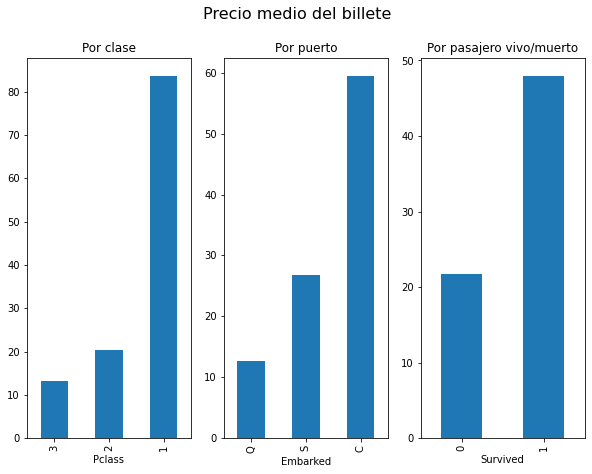

In [284]:
fig, axes = plt.subplots(1, 3, figsize=(10, 7))
fig.suptitle('Precio medio del billete', fontsize=16)
df.groupby('Pclass').mean()['Fare'] \
    .sort_values() \
    .plot(ax=axes[0], kind='bar', figsize=(10, 7), title="Por clase")
df.groupby('Embarked').mean()['Fare'] \
    .sort_values() \
    .plot(ax=axes[1],kind='bar', figsize=(10, 7), title="Por puerto")
df.groupby('Survived').mean()['Fare'] \
    .sort_values() \
    .plot(kind='bar', figsize=(10, 7), title="Por pasajero vivo/muerto")



In [285]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=40, X=df['Age'], y=df['Fare']):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(df['Age'], df['Fare'],df['Num_Familiares'], c='red', s=30)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Edad')
    ax.set_ylabel('Tarifa')
    ax.set_zlabel('Nº Familiares')
interact(plot_3D, elev=(-90, 90), azip=(-180, 180),
         X=fixed(df['Age']), y=fixed(df['Fare'],));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=40, descriptio…

Text(0.5, 0, 'Nº Familiares')

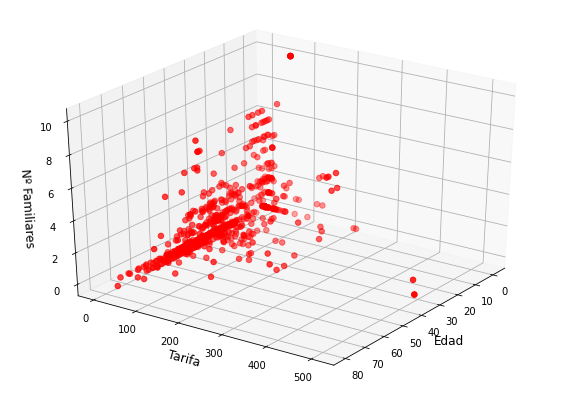

In [286]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Fare'], df['Num_Familiares'], c='red', s=30)
ax.view_init(30, 35) # 1er argumento elevacion, 2º el acimut
ax.set_xlabel('Edad', size= 12)
ax.set_ylabel('Tarifa', size= 12)
ax.set_zlabel('Nº Familiares', size= 12)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

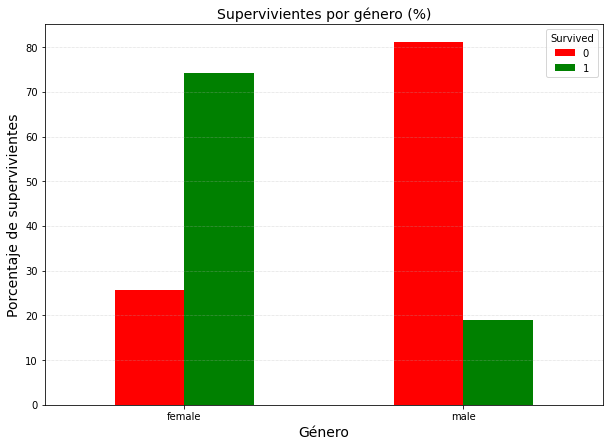

In [287]:
plot = pd.crosstab(index=df['Sex'],columns=df['Survived']).apply(lambda r: r/r.sum() *100,axis=1).plot(kind='bar',figsize=(10,7),color=['red', 'green'])
plt.ylabel('Porcentaje de supervivientes', size=14)
plt.xlabel('Género', size=14)
plt.title('Supervivientes por género (%)', size=14)
plt.grid(axis='y',linestyle='dotted', linewidth=0.5)
plt.xticks(rotation=0)

In [288]:
import plotly.graph_objects as go
# Create dimensions
edad_dim = go.parcats.Dimension(
    values=df.GrupoEdad,
    label="GrupoEdad"
)
puerto_dim = go.parcats.Dimension(
    values=df.Embarked,
    label="Puerto"
)

class_dim = go.parcats.Dimension(
    values=df.Pclass,
    categoryorder='category ascending', label="Clase"
)

gender_dim = go.parcats.Dimension(values=df.Sex, label="Género")

Familia_dim = go.parcats.Dimension(values=df.Familia, label="Familia")

survival_dim = go.parcats.Dimension(
    values=df.Survived, label="Sobrevive", categoryarray=[0, 1],
    ticktext=['No', 'Sí']
)

# Create parcats trace
color = df.Survived;
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']];

fig = go.Figure(data = [go.Parcats(dimensions=[survival_dim,gender_dim,class_dim, edad_dim,  puerto_dim,  Familia_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform')])

fig.show()

## R

In [237]:
# activate R magic para usar en el mismo colab tanto lenguaje python como R
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [238]:
%%R
library(readr)
datos <- read_csv("train.csv")
head(datos)


── Column specification ────────────────────────────────────────────────────────
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)

# A tibble: 6 x 12
  PassengerId Survived Pclass Name    Sex     Age SibSp Parch Ticket  Fare Cabin
        <dbl>    <dbl>  <dbl> <chr>   <chr> <dbl> <dbl> <dbl> <chr>  <dbl> <chr>
1           1        0      3 Braund… male     22     1     0 A/5 2…  7.25 <NA> 
2           2        1      1 Cuming… fema…    38     1     0 PC 17… 71.3  C85  
3           3        1      3 Heikki… fema…    26     0     0 STON/…  7.92 <NA> 
4           4        1      1 Futrel… fema…    35     1     0 113803 53.1  C123 
5           5        0      3 Allen,… male     35     0     0 373450  8.05 <NA> 
6           6

In [239]:
%%R
datos_procesados <- datos
datos_procesados <- datos_procesados[,c(-1,-4,-9,-11)]
datos_procesados$Num_Familiares <- datos_procesados$SibSp+datos_procesados$Parch
datos_procesados$Family <- datos_procesados$Num_Familiares
datos_procesados <- datos_procesados[,c(-5,-6)]
datos_procesados$Family[datos_procesados$Family>0] <- "Si"
datos_procesados$Family[datos_procesados$Family==0] <- "No"
datos_procesados$Fare <- round(datos_procesados$Fare,2)
datos_procesados$Age <- as.integer(datos_procesados$Age)
datos_procesados$Num_Familiares <- as.integer(datos_procesados$Num_Familiares)
datos_procesados$Embarked[is.na(datos_procesados$Embarked)] <- "S"
head(datos_procesados)

# A tibble: 6 x 8
  Survived Pclass Sex      Age  Fare Embarked Num_Familiares Family
     <dbl>  <dbl> <chr>  <int> <dbl> <chr>             <int> <chr> 
1        0      3 male      22  7.25 S                     1 Si    
2        1      1 female    38 71.3  C                     1 Si    
3        1      3 female    26  7.92 S                     0 No    
4        1      1 female    35 53.1  S                     1 Si    
5        0      3 male      35  8.05 S                     0 No    
6        0      3 male      NA  8.46 Q                     0 No    


In [240]:
%%R
datos_procesados$GrupoEdad <- datos_procesados$Age

In [241]:
%%R
summary(datos_procesados)

    Survived          Pclass          Sex                 Age       
 Min.   :0.0000   Min.   :1.000   Length:891         Min.   : 0.00  
 1st Qu.:0.0000   1st Qu.:2.000   Class :character   1st Qu.:20.00  
 Median :0.0000   Median :3.000   Mode  :character   Median :28.00  
 Mean   :0.3838   Mean   :2.309                      Mean   :29.68  
 3rd Qu.:1.0000   3rd Qu.:3.000                      3rd Qu.:38.00  
 Max.   :1.0000   Max.   :3.000                      Max.   :80.00  
                                                     NA's   :177    
      Fare          Embarked         Num_Familiares       Family         
 Min.   :  0.00   Length:891         Min.   : 0.0000   Length:891        
 1st Qu.:  7.91   Class :character   1st Qu.: 0.0000   Class :character  
 Median : 14.45   Mode  :character   Median : 0.0000   Mode  :character  
 Mean   : 32.20                      Mean   : 0.9046                     
 3rd Qu.: 31.00                      3rd Qu.: 1.0000                     
 Max

In [242]:
%%R
cols <- c("Survived","Pclass","Sex","Embarked","Family")
datos_procesados[cols] <- lapply(datos_procesados[cols],factor)
print(dim(datos_procesados))
summary(datos_procesados)

[1] 891   9
 Survived Pclass      Sex           Age             Fare        Embarked
 0:549    1:216   female:314   Min.   : 0.00   Min.   :  0.00   C:168   
 1:342    2:184   male  :577   1st Qu.:20.00   1st Qu.:  7.91   Q: 77   
          3:491                Median :28.00   Median : 14.45   S:646   
                               Mean   :29.68   Mean   : 32.20           
                               3rd Qu.:38.00   3rd Qu.: 31.00           
                               Max.   :80.00   Max.   :512.33           
                               NA's   :177                              
 Num_Familiares    Family     GrupoEdad    
 Min.   : 0.0000   No:537   Min.   : 0.00  
 1st Qu.: 0.0000   Si:354   1st Qu.:20.00  
 Median : 0.0000            Median :28.00  
 Mean   : 0.9046            Mean   :29.68  
 3rd Qu.: 1.0000            3rd Qu.:38.00  
 Max.   :10.0000            Max.   :80.00  
                            NA's   :177    


In [243]:
%%R
train <- datos_procesados
#attach(train)
print(dim(train))
head(train)

[1] 891   9
# A tibble: 6 x 9
  Survived Pclass Sex      Age  Fare Embarked Num_Familiares Family GrupoEdad
  <fct>    <fct>  <fct>  <int> <dbl> <fct>             <int> <fct>      <int>
1 0        3      male      22  7.25 S                     1 Si            22
2 1        1      female    38 71.3  C                     1 Si            38
3 1        3      female    26  7.92 S                     0 No            26
4 1        1      female    35 53.1  S                     1 Si            35
5 0        3      male      35  8.05 S                     0 No            35
6 0        3      male      NA  8.46 Q                     0 No            NA


In [244]:
%%R
summary(train)

 Survived Pclass      Sex           Age             Fare        Embarked
 0:549    1:216   female:314   Min.   : 0.00   Min.   :  0.00   C:168   
 1:342    2:184   male  :577   1st Qu.:20.00   1st Qu.:  7.91   Q: 77   
          3:491                Median :28.00   Median : 14.45   S:646   
                               Mean   :29.68   Mean   : 32.20           
                               3rd Qu.:38.00   3rd Qu.: 31.00           
                               Max.   :80.00   Max.   :512.33           
                               NA's   :177                              
 Num_Familiares    Family     GrupoEdad    
 Min.   : 0.0000   No:537   Min.   : 0.00  
 1st Qu.: 0.0000   Si:354   1st Qu.:20.00  
 Median : 0.0000            Median :28.00  
 Mean   : 0.9046            Mean   :29.68  
 3rd Qu.: 1.0000            3rd Qu.:38.00  
 Max.   :10.0000            Max.   :80.00  
                            NA's   :177    


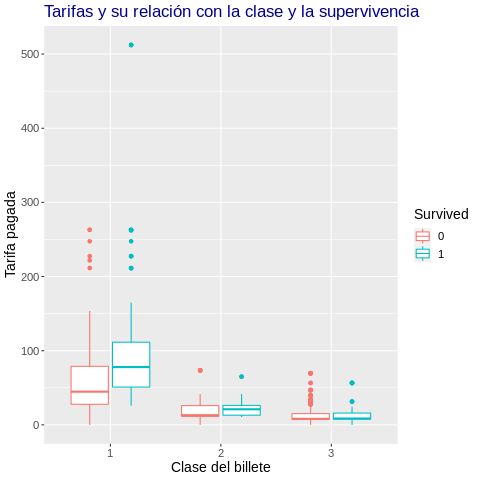

In [245]:
%%R
library(ggplot2) 
box1=ggplot(train,aes(x=Pclass,y=Fare, color=Survived))+geom_boxplot()+
  labs(title = "Tarifas y su relación con la clase y la supervivencia")+ylab("Tarifa pagada") + xlab("Clase del billete")+
  theme(plot.title = element_text(size = rel(1.2), colour = "blue4")) +
  scale_fill_manual(values = alpha(c("brown1", "aquamarine4"), 1)) +
    theme (text = element_text(size=14))

box1

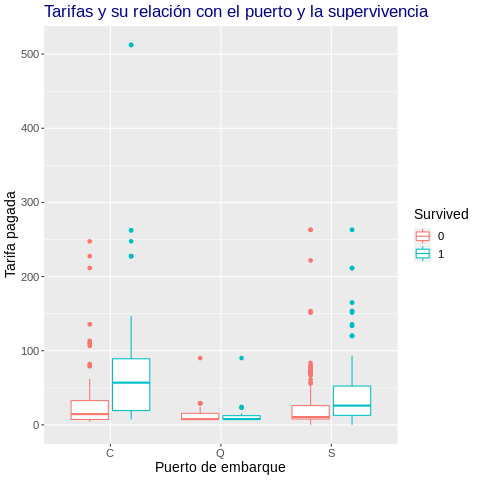

In [246]:
%%R
library(ggplot2) 
box2=ggplot(train,aes(x=Embarked,y=Fare, color=Survived))+geom_boxplot()+
  labs(title = "Tarifas y su relación con el puerto y la supervivencia")+ylab("Tarifa pagada") + xlab("Puerto de embarque")+
  theme(plot.title = element_text(size = rel(1.2), colour = "blue4")) +
  scale_fill_manual(values = alpha(c("brown1", "aquamarine4"), 1)) +
    theme (text = element_text(size=14))
box2

In [247]:
%%R
require(tidyverse)
train.Sex = train %>% 
  filter(Sex != "NA") %>% 
  group_by(Sex) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(Sex)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)

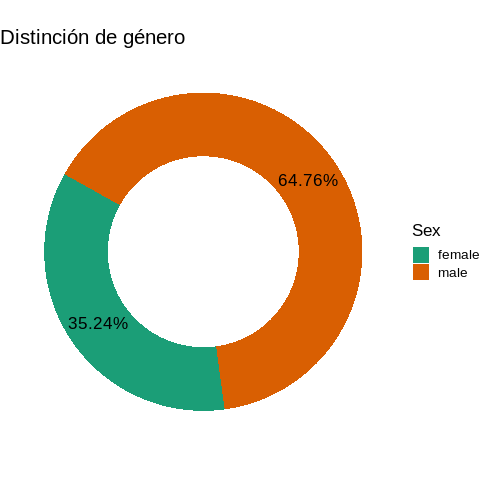

In [248]:
%%R
library(ggplot2)
ring1=ggplot(data = train.Sex, 
       aes(x = 2, y = percentage, fill = Sex))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black", size=6) +
  theme_void() +
  scale_fill_brewer(palette = "Dark2")+
  xlim(.2,2.5)+ 
    theme (text = element_text(size=17))+
  labs(title = "Distinción de género")
  ring1

In [249]:
%%R
train.Pclass = train %>% 
  filter(Pclass != "NA") %>% 
  group_by(Pclass) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(Pclass)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)

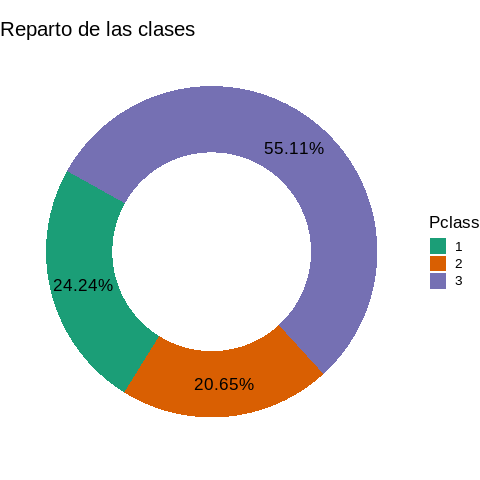

In [250]:
%%R
ring2=ggplot(data = train.Pclass, 
       aes(x = 2, y = percentage, fill = Pclass))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black", size=6) +
  theme_void() +
  scale_fill_brewer(palette = "Dark2")+
  xlim(.2,2.5)+ 
    theme (text = element_text(size=17))+
  labs(title = "Reparto de las clases")
ring2

In [251]:
%%R
train.Embarked = train %>% 
  filter(Embarked != "NA") %>% 
  group_by(Embarked) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(Embarked)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)

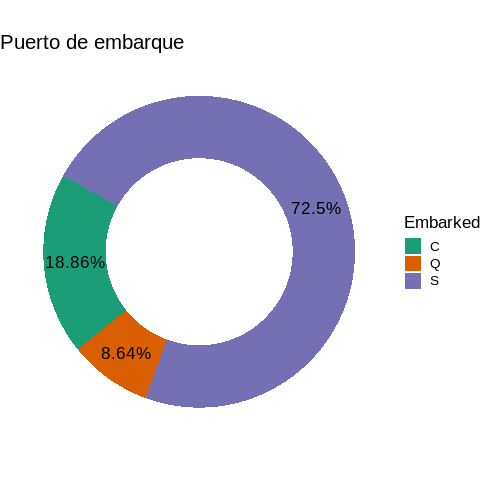

In [252]:
%%R
ring3=ggplot(data = train.Embarked, 
       aes(x = 2, y = percentage, fill = Embarked))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black", size=6) +
  theme_void() +
  scale_fill_brewer(palette = "Dark2")+
  xlim(.2,2.5)+ 
    theme (text = element_text(size=17))+
  labs(title = "Puerto de embarque")
ring3

In [253]:
%%R
train.Family = train %>% 
  filter(Family != "NA") %>% 
  group_by(Family) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(Family)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)

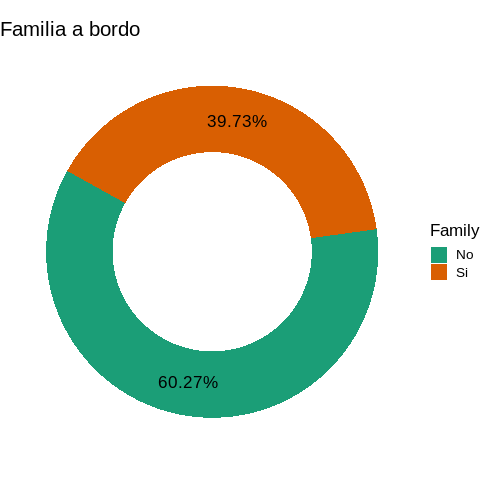

In [254]:
%%R
ring4=ggplot(data = train.Family, 
       aes(x = 2, y = percentage, fill = Family))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black", size=6) +
  theme_void() +
  scale_fill_brewer(palette = "Dark2")+
  xlim(.2,2.5)+ 
    theme (text = element_text(size=17))+
  labs(title = "Familia a bordo")
ring4

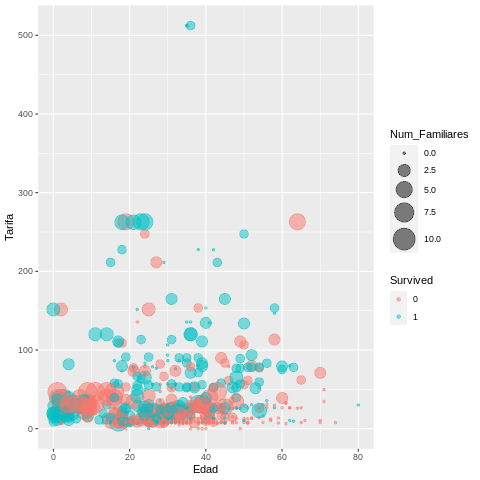

In [255]:
%%R
#install.packages('plotly')
#library(dplyr)
library(plotly)
bur1= ggplot(train, aes(x=Age, y=Fare, size = Num_Familiares, color=Survived)) +
    geom_point(alpha=0.5) +
    scale_size(range = c(1, 10)) +
    theme(legend.position="right") +
    ylab("Tarifa") +
    xlab("Edad")
bur1
#bur2 <- ggplotly(bur1, hoverinfo='count+probability')
#bur2

In [256]:
%%R
train<-na.omit(train) 

In [257]:
%%R
for (i in 1:length(train$Age)) {
  if ((train$Age[i]>=0)&(train$Age[i]<12)) {
    train$GrupoEdad[i]="0-11"}
  else if ((train$Age[i]>=12)&(train$Age[i]<19)) {
    train$GrupoEdad[i]="12-18"}
  else if ((train$Age[i]>=19)&(train$Age[i]<28)) {
    train$GrupoEdad[i]="19-27"}
  else if ((train$Age[i]>=28)&(train$Age[i]<38)) {
    train$GrupoEdad[i]="28-37"}
  else if ((train$Age[i]>=38)&(train$Age[i]<100)) {
    train$GrupoEdad[i]=">37"}
}

In [258]:
%%R
summary(train)

 Survived Pclass      Sex           Age             Fare        Embarked
 0:424    1:186   female:261   Min.   : 0.00   Min.   :  0.00   C:130   
 1:290    2:173   male  :453   1st Qu.:20.00   1st Qu.:  8.05   Q: 28   
          3:355                Median :28.00   Median : 15.74   S:556   
                               Mean   :29.68   Mean   : 34.69           
                               3rd Qu.:38.00   3rd Qu.: 33.38           
                               Max.   :80.00   Max.   :512.33           
 Num_Familiares  Family    GrupoEdad        
 Min.   :0.000   No:404   Length:714        
 1st Qu.:0.000   Si:310   Class :character  
 Median :0.000            Mode  :character  
 Mean   :0.944                              
 3rd Qu.:1.000                              
 Max.   :7.000                              


In [259]:
%%R
train$GrupoEdad <- factor(train$GrupoEdad, ordered = TRUE, levels = c("0-11", "12-18", "19-27", "28-37", ">37"))

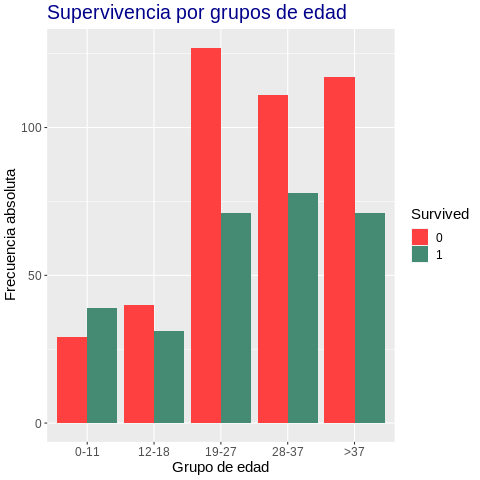

In [260]:
%%R
ggplot(train,aes(x=GrupoEdad, fill=Survived)) +
  labs(title = "Supervivencia por grupos de edad")+ylab("Frecuencia absoluta") + xlab("Grupo de edad") +
  theme(plot.title = element_text(size = rel(1.3), colour = "blue4")) +
  geom_bar(position="dodge") + scale_fill_manual(values = alpha(c("brown1", "aquamarine4"), 1)) +
    theme (text = element_text(size=15))

